### DSC 630 Week  : 
#### Heart Disease ML Final
#### Author: Brian Reppeto 11/11/2024

####  Import necessary libraries for handling data, visualization, and machine learning

In [2]:
# Import libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt


#### Load the Dataset

In [3]:
# load the dataset

file_path =r'C:\Users\brepp\BER Data Science\DSC630\framingham.csv'
data = pd.read_csv(file_path)

#### Head the dataset to see the data

In [4]:
# Head the data

data.head(5)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


#### Inspect the dataset's structure to understand the data types and possible issues

In [5]:
# Basic info about dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


#### Review the summary stats a check for missing values

In [6]:
# Summary stats 

summary_stats = data.describe()

In [7]:
# Look for missing values

missing_values = data.isnull().sum() 

In [8]:
# Call and check

summary_stats, missing_values

(              male          age    education  currentSmoker   cigsPerDay  \
 count  4240.000000  4240.000000  4135.000000    4240.000000  4211.000000   
 mean      0.429245    49.580189     1.979444       0.494104     9.005937   
 std       0.495027     8.572942     1.019791       0.500024    11.922462   
 min       0.000000    32.000000     1.000000       0.000000     0.000000   
 25%       0.000000    42.000000     1.000000       0.000000     0.000000   
 50%       0.000000    49.000000     2.000000       0.000000     0.000000   
 75%       1.000000    56.000000     3.000000       1.000000    20.000000   
 max       1.000000    70.000000     4.000000       1.000000    70.000000   
 
             BPMeds  prevalentStroke  prevalentHyp     diabetes      totChol  \
 count  4187.000000      4240.000000   4240.000000  4240.000000  4190.000000   
 mean      0.029615         0.005896      0.310613     0.025708   236.699523   
 std       0.169544         0.076569      0.462799     0.158280  

#### Replace the missing values with the mean

In [9]:
# Handle missing values

data = data.fillna(data.mean())

#### Ensure that the missing values have been fixed

In [10]:
# Look for missing values

missing_values = data.isnull().sum() 

In [11]:
# recheck for missing values

print(missing_values)

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64


#### Review the target distribution to understand if a class imbalance exists

Text(0.5, 1.0, 'Target Class Count')

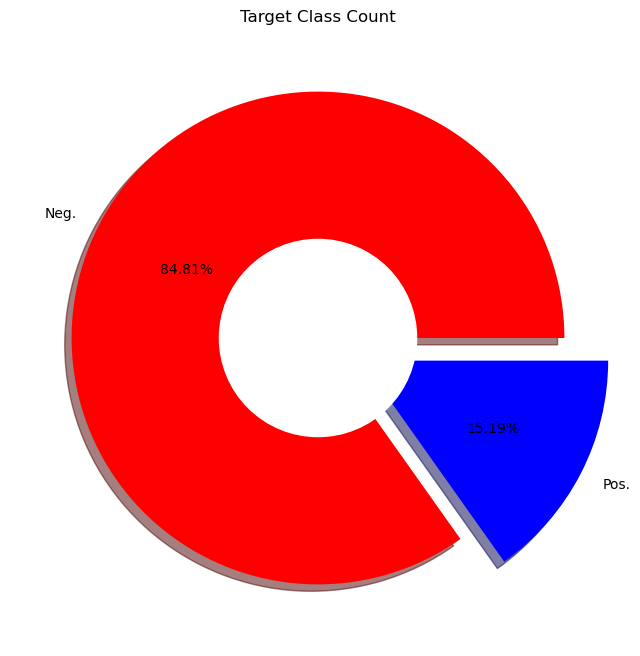

In [12]:
# Class count

plt.figure(figsize=(8,8))
plt.pie(data['TenYearCHD'].value_counts(), labels=['Neg.','Pos.'], autopct='%1.2f%%', explode=[0,0.2], shadow=True, colors=['red','blue'])
my_circle = plt.Circle( (0,0), 0.4, color='white')
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Target Class Count')

#### Create a Feature Correlation Matrix to understand the pairwise correlations

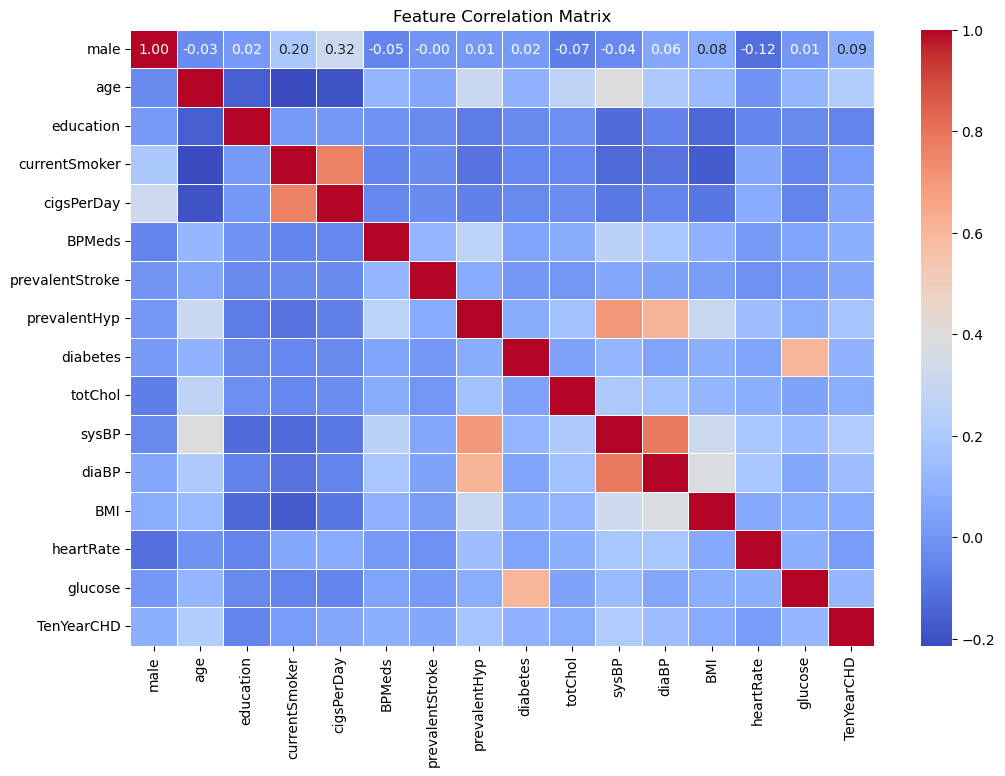

In [13]:
# Create a correlation matrix
corr_matrix = data.corr()

# Plot the heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Feature Correlation Matrix')
plt.show()


#### Divide the data into features verses the target

In [14]:
# Split the data into features and target

X = data.drop(columns=['TenYearCHD'])
y = data['TenYearCHD']


#### Utilize SelectKBest for feature selection to identify the most predictive features.  This will improve the model efficiency and reducing the risk of overfitting.

In [15]:
# Apply SelectKBest to select the top features

selector = SelectKBest(score_func=f_classif, k=5)  # Selecting the top 5 features
X_new = selector.fit_transform(X, y)

# Get the selected feature indices and names

selected_features = selector.get_support(indices=True)
selected_feature_names = [X.columns[i] for i in selected_features]

# Display the selected feature names

selected_feature_names

['age', 'prevalentHyp', 'sysBP', 'diaBP', 'glucose']

#### Divide the data into training and test sets to ensure an unbiased evaluation.  Initialize the models and train the models.  Evauluate the models results

In [16]:
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

# Initialize the models
logreg = LogisticRegression(max_iter=1000)
rf = RandomForestClassifier()

# Train Logistic Regression model
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)

# Train Random Forest model
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Evaluate the models using classification report and ROC-AUC score
logreg_report = classification_report(y_test, y_pred_logreg)
rf_report = classification_report(y_test, y_pred_rf)

roc_auc_logreg = roc_auc_score(y_test, y_pred_logreg)
roc_auc_rf = roc_auc_score(y_test, y_pred_rf)

# Display results
##################logreg_report, roc_auc_logreg, rf_report, roc_auc_rf
# Display results for Logistic Regression and Random Forest
print("==== Logistic Regression Results ====")
print("Classification Report:\n", logreg_report)
print(f"ROC AUC: {roc_auc_logreg:.2f}")

print("\n==== Random Forest Results ====")
print("Classification Report:\n", rf_report)
print(f"ROC AUC: {roc_auc_rf:.2f}")


==== Logistic Regression Results ====
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.99      0.92       725
           1       0.43      0.02      0.05       123

    accuracy                           0.85       848
   macro avg       0.64      0.51      0.48       848
weighted avg       0.80      0.85      0.79       848

ROC AUC: 0.51

==== Random Forest Results ====
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.97      0.91       725
           1       0.30      0.07      0.11       123

    accuracy                           0.84       848
   macro avg       0.58      0.52      0.51       848
weighted avg       0.78      0.84      0.80       848

ROC AUC: 0.52


#### Balance the dataset with SMOTE by oversampling the minority class, to reduce bias toward the majority class. Split the data and train Logistic Regression and Random Forest models and compare model effectiveness on the balanced data

In [17]:
# Apply SMOTE to balance the dataset
sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X_new, y)

# Split the resampled data into training and test sets
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Train Logistic Regression model on SMOTE data
logreg.fit(X_train_smote, y_train_smote)
y_pred_logreg_smote = logreg.predict(X_test_smote)

# Train Random Forest model on SMOTE data
rf.fit(X_train_smote, y_train_smote)
y_pred_rf_smote = rf.predict(X_test_smote)

# Evaluate the models using classification report and ROC-AUC score
logreg_report_smote = classification_report(y_test_smote, y_pred_logreg_smote)
rf_report_smote = classification_report(y_test_smote, y_pred_rf_smote)

roc_auc_logreg_smote = roc_auc_score(y_test_smote, y_pred_logreg_smote)
roc_auc_rf_smote = roc_auc_score(y_test_smote, y_pred_rf_smote)

# Display results
############logreg_report_smote, roc_auc_logreg_smote, rf_report_smote, roc_auc_rf_smote
# Display results in a structured format

print("Logistic Regression with SMOTE Results:")
print("----------------------------------------")
print("Classification Report:")
print(logreg_report_smote)
print(f"ROC AUC Score: {roc_auc_logreg_smote:.4f}\n")

print("Random Forest with SMOTE Results:")
print("---------------------------------")
print("Classification Report:")
print(rf_report_smote)
print(f"ROC AUC Score: {roc_auc_rf_smote:.4f}")


Logistic Regression with SMOTE Results:
----------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.65      0.66       745
           1       0.63      0.64      0.63       694

    accuracy                           0.65      1439
   macro avg       0.65      0.65      0.65      1439
weighted avg       0.65      0.65      0.65      1439

ROC AUC Score: 0.6453

Random Forest with SMOTE Results:
---------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.88      0.88       745
           1       0.87      0.87      0.87       694

    accuracy                           0.87      1439
   macro avg       0.87      0.87      0.87      1439
weighted avg       0.87      0.87      0.87      1439

ROC AUC Score: 0.8706


#### ROC Curve Calculation and Visualization for the Logistic Regression and Random Forest models. The AUC scores are used to evaluate their performance on the balanced dataset. The plot visually compares each model’s classification ability, with higher AUC values indicating better performance. A reference line for random guessing (AUC = 0.5) is included as a benchmark

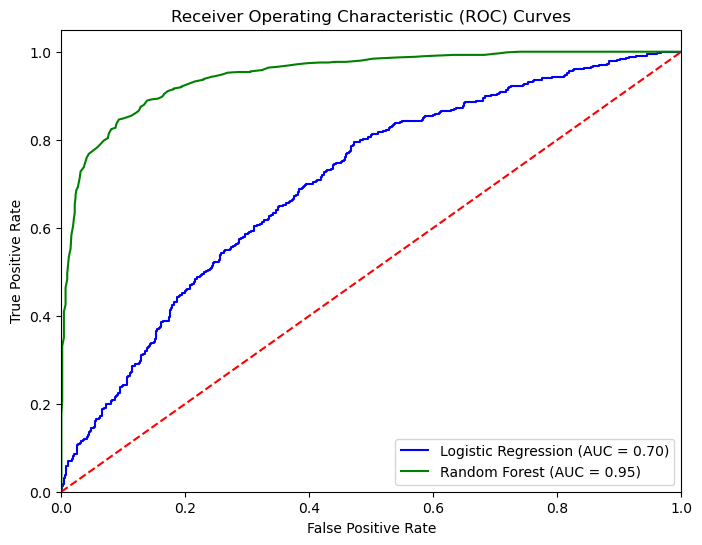

In [18]:
# Calculate ROC curves and AUC for both models

fpr_logreg, tpr_logreg, _ = roc_curve(y_test_smote, logreg.predict_proba(X_test_smote)[:, 1])
fpr_rf, tpr_rf, _ = roc_curve(y_test_smote, rf.predict_proba(X_test_smote)[:, 1])

roc_auc_logreg_smote = auc(fpr_logreg, tpr_logreg)
roc_auc_rf_smote = auc(fpr_rf, tpr_rf)

# Plotting the ROC curves

plt.figure(figsize=(8, 6))
plt.plot(fpr_logreg, tpr_logreg, color='blue', label=f'Logistic Regression (AUC = {roc_auc_logreg_smote:.2f})')
plt.plot(fpr_rf, tpr_rf, color='green', label=f'Random Forest (AUC = {roc_auc_rf_smote:.2f})')

plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Reference line for random guess
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc='lower right')
plt.show()
